In [12]:
import torch
import matplotlib.pyplot as plt

In [13]:
# load the loads to word array 
words = open('names.txt','r').read().splitlines()

In [14]:
# print first 10 chars 
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [15]:
# length of the word array 
print(len(words))

32033


### Part A : Bi-gram level predictions based on the bi-gram frequency 

In [16]:
# max and min word length 
print(f'max length of a word in the words array = {max(len(w) for w in words)}')
print(f'min length of a word in the words array = {min(len(w) for w in words)}')

max length of a word in the words array = 15
min length of a word in the words array = 2


In [17]:
# create character bi-gram dictionary with bi-gram frequancy 
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1

In [18]:
# first 20 bi-grams which has highest occurance (freq.)
sorted(b.items(),key = lambda kv : -kv[1])[:20]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422)]

In [19]:
# make encoder (chars->int) and decoder (int->chars)
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] =0
itos = {i:s for s,i in stoi.items()}

In [20]:
# this will store the bi-gram freq. (first char along the row and second along the col.)
N = torch.zeros((27, 27), dtype=torch.int32)

for w in words:
    chs = ['.'] + list(w) + ['.']   # start and end with char "."
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] +=1

In [21]:
N[:3]

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0]], dtype=torch.int32)

In [22]:
# this is showing the probability of all the characters that can come after letter '.', i.e. N[0]
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [23]:
# we want to find the next char after letter 'a'
g = torch.Generator().manual_seed(2147483647)   # this is to make same output 
ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
itos[ix]

'j'

In [24]:
# P                   : 27,27
# P.sum(1,keepdims=T) : 27,1
# According to broadcasting rules this 

In [25]:
P = (N+1).float()   # here we add 1 to remve the zero probablities 
P /= P.sum(1,keepdims=True)
print(P[0])

tensor([3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
        1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
        4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
        5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
        4.2109e-03, 1.6719e-02, 2.9008e-02])


In [26]:
# let's try to generate few words completely based on the bi-gram probabilities (or count freq.)
g = torch.Generator().manual_seed(2147483647)  # generator 

for i in range(5):                             # generate 5 words 
    out = []
    ix = 0                                     # start with char '.'
    while True:
        p = P[ix]                              # pluck one raw of P 
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item() # get the next char index
        out.append(itos[ix])                   # append the next char to "out" list
        
        if ix ==0:                             # stop generating more chars if the current char is '.'
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.


### Part B: Bi-gram level predictions using gradient descent optimization 

In [27]:
# GOAL: maximize the likelyhood of data w.r.t. model parameters (statistical modeling)
# this is equivalent to the maximizing log likelyhood (note that log is monotonic)
# maximizing log-likelyhood is same as minimizing negetive log likelyhood
# so the final minimization is minimize the average negative log -likelyhood 

In [28]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
print(f'avergae negative log likelyhood :{-log_likelihood/n}')

avergae negative log likelyhood :2.4543561935424805


In [29]:
# let's create training set of bigrams (x,y)

xs,ys = [],[]

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [30]:
# this is the input (we have to one-hot encode)
xs

tensor([ 0,  5, 13, 13,  1])

In [31]:
# this is the target (output) of the network 
ys

tensor([ 5, 13, 13,  1,  0])

In [32]:
# let's one-hot encode the input 
import torch.nn.functional as F 
xenc = F.one_hot(xs,num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [33]:
xenc.shape

torch.Size([5, 27])

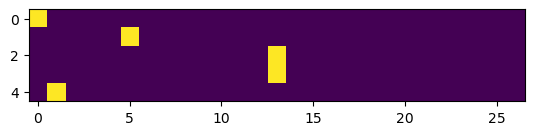

In [34]:
plt.imshow(xenc)

In [35]:
# weight matrix (input layer), the input size = 27 (chars) and lets make output size = 27 
# output_size = 27 is a fair argument (at least for now), as we insert one char (out of 27) and need to output another char (out of 27)

W = torch.randn((27,27))  # weight matrix (we initialize it with random numbers)
xenc @ W                  # this is the output 


tensor([[-9.3077e-01, -6.4540e-01, -1.2990e+00,  1.8234e-02, -4.0779e-01,
          2.1252e+00, -1.6899e+00,  1.1917e+00,  1.1961e+00, -3.6455e-01,
         -6.9090e-02,  1.3015e+00, -8.1208e-01, -4.1094e-01, -1.7527e-01,
         -1.2484e+00,  6.9964e-01,  9.2687e-01,  1.0867e+00,  1.1805e-03,
         -1.0427e+00,  7.2859e-02, -8.6493e-01, -1.7336e-01, -3.2089e-01,
         -1.2865e-01,  8.8367e-01],
        [ 1.1091e+00,  9.0565e-01, -5.7649e-01,  3.4041e-01,  3.9209e-01,
         -9.7180e-02, -1.4673e+00, -3.7074e-01, -1.1074e+00, -8.1330e-01,
         -1.6823e-01,  2.3594e-01,  3.4943e-01,  5.3269e-01,  1.0863e+00,
         -4.2405e-01, -7.8057e-01,  4.9633e-01, -1.8923e-01,  1.5615e+00,
         -6.5979e-01,  7.8055e-01,  5.6760e-01, -6.7544e-02,  9.6104e-01,
         -1.2404e+00,  2.2822e-02],
        [-9.1065e-01, -9.3891e-01, -9.9417e-01,  6.2410e-01,  7.7323e-01,
         -1.1691e-01,  1.0978e+00, -1.9726e+00, -1.0948e+00, -9.6604e-01,
         -1.9925e+00, -4.1975e-01,  6.83

In [36]:
# let's convert logits (network -outputs) into probabilities

logits = xenc @ W # logits, log-counts 
counts = logits.exp() # this is equivalent to counts N
probs = counts/counts.sum(1,keepdims=True)
probs

tensor([[0.0097, 0.0129, 0.0067, 0.0250, 0.0163, 0.2053, 0.0045, 0.0807, 0.0811,
         0.0170, 0.0229, 0.0901, 0.0109, 0.0163, 0.0206, 0.0070, 0.0494, 0.0619,
         0.0727, 0.0245, 0.0086, 0.0264, 0.0103, 0.0206, 0.0178, 0.0216, 0.0593],
        [0.0810, 0.0661, 0.0150, 0.0376, 0.0395, 0.0242, 0.0062, 0.0184, 0.0088,
         0.0118, 0.0226, 0.0338, 0.0379, 0.0455, 0.0792, 0.0175, 0.0122, 0.0439,
         0.0221, 0.1273, 0.0138, 0.0583, 0.0471, 0.0250, 0.0699, 0.0077, 0.0273],
        [0.0106, 0.0103, 0.0097, 0.0491, 0.0570, 0.0234, 0.0789, 0.0037, 0.0088,
         0.0100, 0.0036, 0.0173, 0.0282, 0.0873, 0.1364, 0.0601, 0.0283, 0.0109,
         0.0725, 0.0046, 0.0772, 0.0248, 0.0095, 0.0190, 0.0995, 0.0292, 0.0301],
        [0.0106, 0.0103, 0.0097, 0.0491, 0.0570, 0.0234, 0.0789, 0.0037, 0.0088,
         0.0100, 0.0036, 0.0173, 0.0282, 0.0873, 0.1364, 0.0601, 0.0283, 0.0109,
         0.0725, 0.0046, 0.0772, 0.0248, 0.0095, 0.0190, 0.0995, 0.0292, 0.0301],
        [0.0049, 0.0254,

In [37]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5),ys].log().mean() # this is the loss (negative log-likelyhood OR cross entrophy) 
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [38]:
# backward pass, we want to find the gradient of the loss w.r.t weights 
W.grad = None 
loss.backward()
W.data += -0.1*W.grad

In [39]:
# let's optimize the weights of the net using gradient-descent and get the bigram level predictions

# step 01: create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [54]:
# step 02: gradient descent (after this weights are optimized to match the targets)
for k in range(50):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.509854793548584
2.5089924335479736


2.5081682205200195
2.507380247116089
2.5066258907318115
2.5059030055999756
2.5052108764648438
2.5045459270477295
2.503908157348633
2.503295421600342
2.502706289291382
2.5021398067474365
2.5015945434570312
2.5010693073272705
2.500562906265259
2.500075578689575
2.4996049404144287
2.499150514602661
2.4987120628356934
2.49828839302063
2.4978787899017334
2.497483015060425
2.4970998764038086
2.4967286586761475
2.496370315551758
2.496022939682007
2.4956860542297363
2.4953596591949463
2.4950432777404785
2.4947361946105957
2.494438648223877
2.494149684906006
2.4938690662384033
2.4935967922210693
2.4933321475982666
2.493074893951416
2.4928252696990967
2.492582321166992
2.4923462867736816
2.492116928100586
2.4918932914733887
2.491675853729248
2.491464376449585
2.491258144378662
2.491058111190796
2.4908626079559326
2.4906723499298096
2.4904870986938477
2.4903063774108887
2.4901304244995117


In [41]:
# step 03: sample from the 'neural-net' model 

for i in range(5):
    out = []
    ix = 0 
    while True:
        xenc = F.one_hot(torch.tensor([ix]),num_classes=27).float()
        logits = xenc @ W 
        counts = logits.exp()
        p = counts/counts.sum(1,keepdims=True)
        
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        
        if ix ==0:
            break 
    print(''.join(out))
        

morvann.
akela.
az.
arileri.
chaiadayra.
